In [ ]:
import numpy as np

In [ ]:
class Linear_regression:

  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):
    #no of trainig and feature examples
    self.m,self.n=X.shape #no of rows and cloumns

    #initializing weights
    self.w = np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    #gradient decent for optimization
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):
    Y_prediction = self.predict(self.X)
    #calculate the variance
    dw = - (2 * (self.X.T).dot(self.Y-Y_prediction))/self.m
    db= -(2*np.sum(self.Y-Y_prediction))/self.m

    #updating the weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db


  def predict(self,X):
    return X.dot(self.w)+self.b #wx+b

Using linear regression model for prediction

Step -1 : set learning rate and no of iterations; Initiate random weight and bias value

step -2 : Build linear regression equation (Y= Wx + b)

Step -3 : Find the "y prediction" value for the given x value for yhe corresponding weight & bias

Step -4 : check the loss function for the parameter values (diff b/w "y prediction" & "true y")

step -5 : update the parameter values using gradient descent

step -6: step 3,4,5, are repeated till we get minimum loss function


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
#data pre-processing
dataset = pd.read_csv('/content/salary_data.csv')

In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
dataset.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
x=dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [ ]:
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(30, 1) (20, 1) (10, 1)


In [ ]:
model = Linear_regression(learning_rate = 0.02 , no_of_iterations = 1000)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
#printing the parametr (weight and bias)
print("weight :",model.w[0])
print("Bias : ",model.b)

weight : 9514.400999035135
Bias :  23697.406507136307


In [ ]:
#testing the model
test_predict = model.predict(x_test)
print(test_predict)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


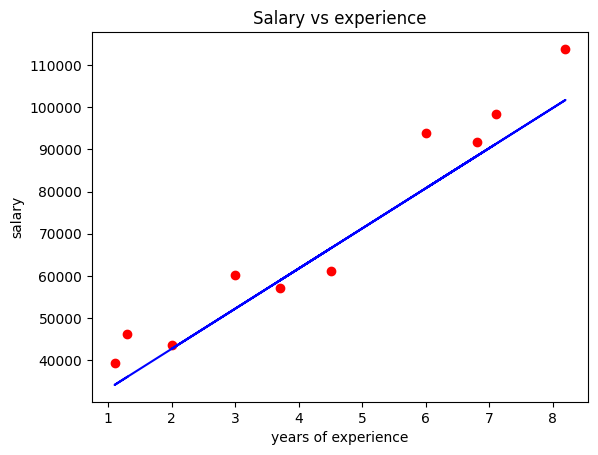

In [ ]:
#data visualization (predicted and actual values)
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_predict,color='blue')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.title('Salary vs experience')
plt.show()